In [1]:
from keras.datasets import imdb
from keras import models
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_X, train_Y), (test_X, test_Y) = imdb.load_data( num_words = 20000 )

In [3]:
print(train_X[0][0:10],'.....')  #these are words encoded as numbers

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65] .....


In [4]:
print(train_Y[0]) #either 0 or 1 : 0 means negative review, 1 means positive review

1


In [5]:
word_to_index = imdb.get_word_index()

In [6]:
#first movie review
reverse_index = dict( [ (word_to_index[key], key) for key in word_to_index.keys() ])
review = ' '.join( [ reverse_index.get(i-3,'?') for i in train_X[0] ] )
print(review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what th

In [7]:
#Encode as one hot vectors
def one_hot_vectors( encoded_sentences ):
    start = np.zeros((len(encoded_sentences),20000))
    for i, sentence in enumerate(encoded_sentences):
        start[i, sentence] = 1 #sentence is list of numbers, numpy is cool af
    return start

In [8]:
train_X = one_hot_vectors(train_X)
test_X = one_hot_vectors(test_X)

In [21]:
# write the model
def get_model( activations, hidden_units_per_layer, loss_function ):
    model = models.Sequential()
    #assume atleast one layer
    model.add(Dense(hidden_units_per_layer[0], activation=activations, input_shape=(20000,)))
    for hidden_unit in hidden_units_per_layer[1:]:
        model.add(Dense(hidden_unit, activation=activations))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=loss_function, 
                  optimizer='sgd', #sgd after previously using adagrad, i want to see smooth curve of training accuracy,adagrad is too good!! 
                  metrics=['accuracy'])
    return model

def fit_and_plot_history( model, train_X, train_Y ):
    #we also need a validation set - IDEALLY SHOULD BE random
    val_X = train_X[:10000]  
    part_train_X = train_X[10000:]  #ideally should be named something else
    val_Y = train_Y[:10000]
    part_train_Y = train_Y[10000:]
    history = model.fit(part_train_X, part_train_Y, 
                        verbose=0,
                        epochs=10, batch_size=256, validation_data=(val_X,val_Y))
    
    # plot how training and validation accuracy changes over time
    plt.figure(figsize=(6,4))
    training_acc = history.history['accuracy']
    validation_acc = history.history['val_accuracy']
    plt.plot( range(1, len(training_acc)+1), training_acc, 'b.', label='Training accuracy')
    plt.plot( range(1, len(validation_acc)+1), validation_acc, 'r+', label='Testing accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim([0,1.1])
    plt.legend()
    plt.show()
    
    # Let's try on training data
    results = model.evaluate( train_X, train_Y )
    print('Training accuracy is %3.2f' %( results[1]*100))
    
    # Let's try on test data
    results = model.evaluate( test_X, test_Y )
    print('Testing accuracy is %3.2f' %( results[1]*100))

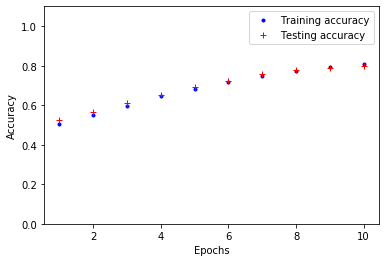

25000/25000 [==============================] - 2s 61us/step
Training accuracy is 80.82
25000/25000 [==============================] - 2s 73us/step
Testing accuracy is 80.13


In [22]:
model = get_model('relu', [32, 64, 128], 'binary_crossentropy')
fit_and_plot_history(model, train_X, train_Y )

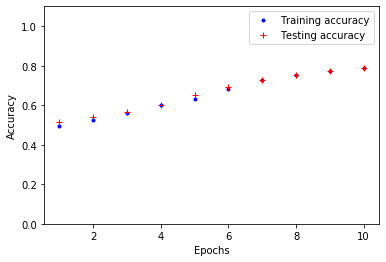

25000/25000 [==============================] - 2s 62us/step
Training accuracy is 79.50
25000/25000 [==============================] - 2s 64us/step
Testing accuracy is 78.92


In [23]:
model = get_model('relu', [32, 128, 512], 'binary_crossentropy')
fit_and_plot_history(model, train_X, train_Y )

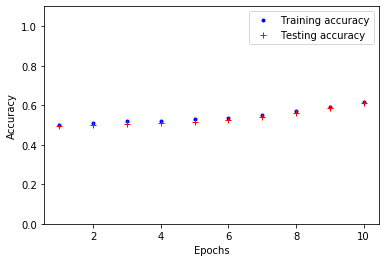

25000/25000 [==============================] - 1s 57us/step
Training accuracy is 62.36
25000/25000 [==============================] - 1s 57us/step
Testing accuracy is 62.14


In [24]:
model = get_model('relu', [32, 64, 128], 'mse')
fit_and_plot_history(model, train_X, train_Y )

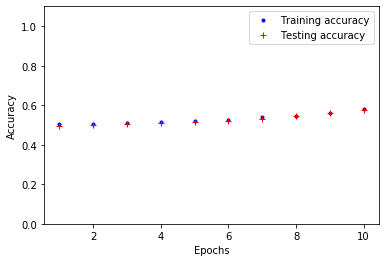

25000/25000 [==============================] - 2s 63us/step
Training accuracy is 58.62
25000/25000 [==============================] - 2s 61us/step
Testing accuracy is 58.49


In [25]:
model = get_model('relu', [32, 128, 512], 'mse')
fit_and_plot_history(model, train_X, train_Y )

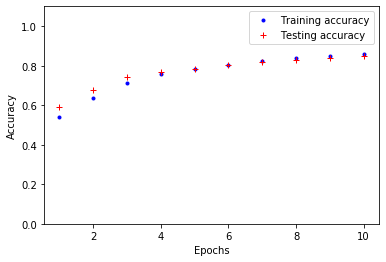

25000/25000 [==============================] - 2s 62us/step
Training accuracy is 85.67
25000/25000 [==============================] - 2s 66us/step
Testing accuracy is 84.36


In [28]:
model = get_model('tanh', [32, 128, 512], 'binary_crossentropy')
fit_and_plot_history(model, train_X, train_Y )

#### Observations :
#### 1. As if increase size of model, we receive lesser accuracy using same number of epochs
#### 2. tanh seems to better than relu activation function in this case
#### 3. 'mse' seems to be better than 'binary_crossentropy'